In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd

In [70]:
df=pd.read_csv('../../data/house-prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df.size

118260

In [72]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### DF fill NA for numerical columns

In [75]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [76]:
str_col=df.select_dtypes(exclude='number').columns
df[str_col]=df[str_col].fillna(df[str_col].mode().iloc[0])

In [77]:
df.size

118260

In [78]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [79]:
label_encoded_col=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                   'Neighborhood','Condition1','Condition2','BldgType',
                   'HouseStyle','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                   'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                   'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                   'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                   'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

label_encoder=LabelEncoder()
for col in label_encoded_col:
    df[col]=label_encoder.fit_transform(df[col])

In [80]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


In [81]:
df_id=df['Id']
price=df['SalePrice']
df=df.drop(['Id'],axis=1)

In [82]:
numeric_columns = df.columns.difference(label_encoded_col)
numeric_columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [83]:
stdScaler=StandardScaler()

In [84]:
for col in numeric_columns:
    df[col]=stdScaler.fit_transform(df[[col]])

In [85]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,3,-0.220875,-0.207142,1,0,3,3,0,4,...,-0.068692,2,2,2,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-0.872563,3,0.460320,-0.091886,1,0,3,3,0,2,...,-0.068692,2,2,2,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,0.073375,3,-0.084636,0.073480,1,0,0,3,0,4,...,-0.068692,2,2,2,-0.087688,0.990891,0.138777,8,4,0.536154
3,0.309859,3,-0.447940,-0.096897,1,0,0,3,0,0,...,-0.068692,2,2,2,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,0.073375,3,0.641972,0.375148,1,0,0,3,0,2,...,-0.068692,2,2,2,-0.087688,2.100892,0.138777,8,4,0.869843


In [89]:
df.size

116800

In [86]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [90]:
X.shape

(1460, 79)

In [91]:
y.shape

(1460,)

## Tree-Based Feature Importance (RECOMMENDED)

For tree models (RandomForest, XGBoost, LightGBM), importance is computed as:

How much a feature reduces impurity (MSE for regression, Gini/Entropy for classification)
across all splits where it is used

In [63]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

OverallQual      5.784086e-01
GrLivArea        1.104879e-01
TotalBsmtSF      3.874164e-02
2ndFlrSF         3.654649e-02
BsmtFinSF1       2.926375e-02
1stFlrSF         2.224266e-02
GarageCars       1.948047e-02
GarageArea       1.420835e-02
LotArea          1.315904e-02
YearBuilt        9.363196e-03
FullBath         7.577168e-03
Neighborhood     7.255084e-03
YearRemodAdd     6.717448e-03
TotRmsAbvGrd     6.640790e-03
LotFrontage      6.461511e-03
BsmtQual         5.754021e-03
BsmtUnfSF        5.265009e-03
MasVnrArea       5.222439e-03
GarageFinish     5.200545e-03
WoodDeckSF       5.190173e-03
OpenPorchSF      4.988010e-03
OverallCond      4.610475e-03
GarageYrBlt      4.425387e-03
MoSold           3.403885e-03
ExterQual        3.253063e-03
GarageType       3.168473e-03
KitchenQual      2.947824e-03
Fireplaces       2.685272e-03
CentralAir       2.671988e-03
BsmtExposure     2.110166e-03
BsmtFinType1     2.004382e-03
MSZoning         2.002014e-03
LotShape         1.936606e-03
BedroomAbv

## Permutation Importance (MODEL-AGNOSTIC & STRONG)

In [64]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    rf, X, y,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_imp = pd.Series(r.importances_mean, index=X.columns)
perm_imp.sort_values(ascending=False)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

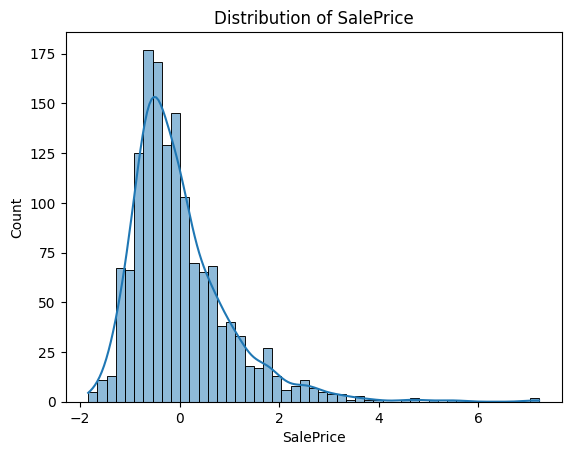

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

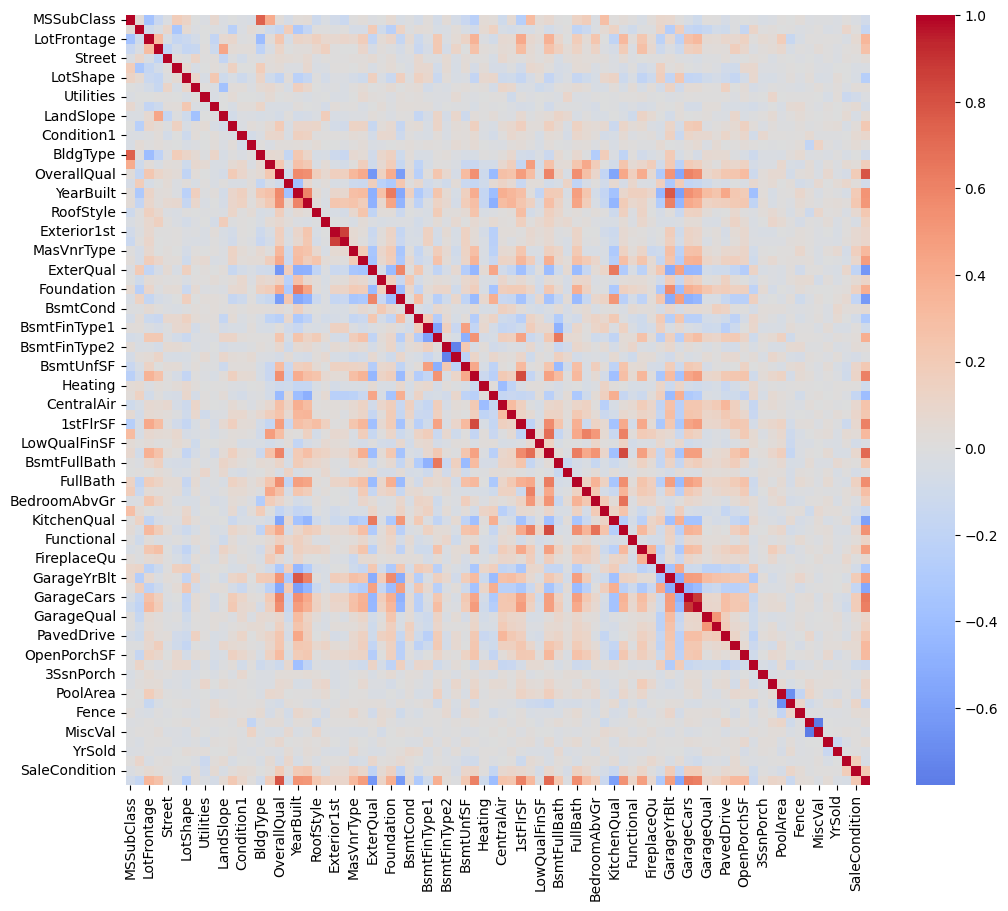

In [95]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

In [97]:
import pandas as pd
import numpy as np

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

### Fit a linear regression or random forest to see actual importance:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted=importances.sort_values(ascending=False)
print(importances_sorted)


OverallQual      5.845634e-01
GrLivArea        1.067818e-01
TotalBsmtSF      3.856531e-02
2ndFlrSF         3.658600e-02
BsmtFinSF1       3.111076e-02
GarageCars       2.452945e-02
1stFlrSF         1.954928e-02
GarageArea       1.578729e-02
LotArea          1.441191e-02
YearBuilt        9.023258e-03
YearRemodAdd     7.204371e-03
WoodDeckSF       6.234453e-03
TotRmsAbvGrd     6.197926e-03
Neighborhood     6.125772e-03
LotFrontage      6.070624e-03
FullBath         5.678746e-03
BsmtUnfSF        5.614007e-03
BsmtQual         4.933606e-03
MasVnrArea       4.769096e-03
GarageYrBlt      4.710210e-03
OverallCond      4.602814e-03
OpenPorchSF      4.525083e-03
GarageFinish     3.863443e-03
MoSold           3.656728e-03
KitchenQual      3.050594e-03
Fireplaces       2.731933e-03
GarageType       2.728794e-03
CentralAir       2.610515e-03
MSZoning         2.369416e-03
ExterQual        1.792869e-03
BsmtExposure     1.755736e-03
BsmtFinType1     1.539204e-03
LotShape         1.479428e-03
YrSold    

In [100]:
least_25 = importances_sorted.index[:25].tolist()
print("25 least important features to drop:", least_25)

25 least important features to drop: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', 'GarageCars', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'WoodDeckSF', 'TotRmsAbvGrd', 'Neighborhood', 'LotFrontage', 'FullBath', 'BsmtUnfSF', 'BsmtQual', 'MasVnrArea', 'GarageYrBlt', 'OverallCond', 'OpenPorchSF', 'GarageFinish', 'MoSold', 'KitchenQual']


In [101]:
X_reduced = X.drop(columns=least_25)
# Optional: check new shape
print("Original shape:", X.shape)
print("New shape:", X_reduced.shape)

Original shape: (1460, 79)
New shape: (1460, 54)


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state=42)

In [104]:
X_train.shape

(1168, 54)

In [105]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [106]:
y_pred = lr_model.predict(X_test)

In [107]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# R-squared score
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 0.35876127899875004
RMSE: 0.5989668429877818
R2 Score: 0.7050149526711735


In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))


Ridge Regression
MSE: 0.3570887626198637
RMSE: 0.5975690442282496
R2 Score: 0.7063901493606293


In [112]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)  # smaller alpha → less shrinkage
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print("Lasso Regression")
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))


Lasso Regression
MSE: 0.3590237155833283
RMSE: 0.5991858773229959
R2 Score: 0.7047991688816333


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Example for Ridge
params = {'alpha':[0.01, 0.1, 1, 10, 50, 100]}
grid = GridSearchCV(Ridge(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Ridge:", grid.best_params_)

# Example for Lasso
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(Lasso(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Lasso:", grid.best_params_)

Best alpha for Ridge: {'alpha': 50}
Best alpha for Lasso: {'alpha': 0.01}


In [114]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge with best alpha
ridge_final = Ridge(alpha=50)
ridge_final.fit(X_train, y_train)
y_pred_ridge = ridge_final.predict(X_test)

# Lasso with best alpha
lasso_final = Lasso(alpha=0.01)
lasso_final.fit(X_train, y_train)
y_pred_lasso = lasso_final.predict(X_test)

# Evaluate
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

evaluate(y_test, y_pred_ridge, "Ridge")
evaluate(y_test, y_pred_lasso, "Lasso")


Ridge -> MSE: 0.3681, RMSE: 0.6067, R2: 0.6974
Lasso -> MSE: 0.3616, RMSE: 0.6014, R2: 0.7027
